In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# 모델링팀 통일안
> **[1] 전처리1**  
  1. null 제거  
  2. 특수 문자 제거(한글만 남기기)  
  3. kospacing => input(그대로 넣음)  
  4. mecab => 형태소 분석기  
  5. stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','흠','아','더']  

> **[2] 전처리2**
  1. tokenizer => threshold=3  
  2. max_len = 50  
  3. vocab_size = 20744   

> **[3] 단어벡터**
  1. word_vector_dim = 100  

> **[4] Validation Split Ratio**  
      0.2  

> **[5] 배치사이즈**  
  64  

> **[6] 옵티마이저**  
  rmsprop  

  
# 이후의 작업  
CNN부터 CNN-LSTM조합까지 최상의 performance를 가진 모델이 키워드 추출팀의 데이터를 감성분석하여, 어떤 요소(단어)가 긍부정을 야기하였는지 단어 추출 및 시각화하는 것을 프로젝트의 종점으로

# Contents Begin Here

# Installing Mecab

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,256 kB]
Hit:12 http://ppa.launchpad.net/cra

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.l

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2758k      0 --:--:-- --:--:-- --:--:-- 2758k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

## Mecab Testing



In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()
sentence = "안녕하세요 저는 천재입니다."
temp_X = mecab.morphs(sentence)
temp_X

['안녕', '하', '세요', '저', '는', '천재', '입니다', '.']

In [ ]:
!pip list -v

Package                       Version             Location                               Installer
----------------------------- ------------------- -------------------------------------- ---------
absl-py                       0.12.0              /usr/local/lib/python3.7/dist-packages pip
alabaster                     0.7.12              /usr/local/lib/python3.7/dist-packages pip
albumentations                0.1.12              /usr/local/lib/python3.7/dist-packages pip
altair                        4.1.0               /usr/local/lib/python3.7/dist-packages pip
appdirs                       1.4.4               /usr/local/lib/python3.7/dist-packages pip
argon2-cffi                   20.1.0              /usr/local/lib/python3.7/dist-packages pip
arviz                         0.11.2              /usr/local/lib/python3.7/dist-packages pip
astor                         0.8.1               /usr/local/lib/python3.7/dist-packages pip
astropy                       4.2.1               /usr/loc

# Data Preparation (New)

## Import Tokenizer

In [ ]:
import pickle

UNIFIED_DATA_PATH = "/gdrive/MyDrive/01. Programming/2021 데청캠/머신러닝,딥러닝/unified_data/"

with open(UNIFIED_DATA_PATH + 'Tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print(tokenizer)

FileNotFoundError: ignored

## Import Train, Test Data as Numpy Array

In [ ]:
import numpy as np

X_train = np.load(UNIFIED_DATA_PATH + "X_train.npy")
y_train = np.load(UNIFIED_DATA_PATH + "y_train.npy")
X_test = np.load(UNIFIED_DATA_PATH + "X_test.npy")
y_test = np.load(UNIFIED_DATA_PATH + "y_test.npy")

# Modeling (New & Unified)

## RNN

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
vocab_size = 20744

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, 
                    callbacks=[earlystopping, checkpoint], validation_split=0.2)

# Note: unifying params is needed in the future

Epoch 1/10
1858/1858 [==============================] - 68s 36ms/step - loss: 0.4256 - acc: 0.8038 - val_loss: 0.3982 - val_acc: 0.8232

Epoch 00001: val_acc improved from -inf to 0.82322, saving model to best_model.h5
Epoch 2/10
1858/1858 [==============================] - 66s 35ms/step - loss: 0.3528 - acc: 0.8493 - val_loss: 0.3781 - val_acc: 0.8373

Epoch 00002: val_acc improved from 0.82322 to 0.83725, saving model to best_model.h5
Epoch 3/10
1858/1858 [==============================] - 65s 35ms/step - loss: 0.3275 - acc: 0.8624 - val_loss: 0.3707 - val_acc: 0.8383

Epoch 00003: val_acc improved from 0.83725 to 0.83826, saving model to best_model.h5
Epoch 4/10
1858/1858 [==============================] - 65s 35ms/step - loss: 0.2991 - acc: 0.8767 - val_loss: 0.3701 - val_acc: 0.8400

Epoch 00004: val_acc improved from 0.83826 to 0.83998, saving model to best_model.h5
Epoch 5/10
1858/1858 [==============================] - 65s 35ms/step - loss: 0.2757 - acc: 0.8890 - val_loss: 0.39

In [ ]:
PATH = "/gdrive/MyDrive/01. Programming/2021 데청캠/머신러닝,딥러닝/nsmc-master/"

# model.save(PATH + "SimpleRNN_NaverMovie_210716.h5")   # test acc 0.5
# model.save(PATH + "SimpleRNN_NaverMovie_210717.h5")   # test acc 0.8282
# model.save(PATH + "SimpleRNN_NaverMovie_210718.h5")   # test acc 0.8238
# model.save(PATH + "SimpleRNN_nospacing_NaverMovie_210719.h5")   # test acc 0.8238
model.save(PATH + "SimpleRNN_unified_NaverMovie_210719.h5")   # test acc 0.8238

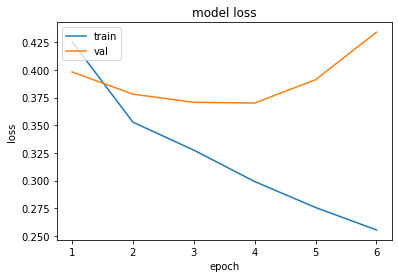

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# testing on the real test data (not the eval data)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test, batch_size=64)[1]))

775/775 [==============================] - 7s 9ms/step - loss: 0.4461 - acc: 0.8090

 테스트 정확도: 0.8090


## BiLSTM

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import LSTM, Bidirectional,Embedding, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, 
                    callbacks=[earlystopping, checkpoint], validation_split=0.2)

# Note: unifying params is needed in the future

Epoch 1/10
1858/1858 [==============================] - 258s 137ms/step - loss: 0.3875 - acc: 0.8258 - val_loss: 0.3609 - val_acc: 0.8412

Epoch 00001: val_acc improved from -inf to 0.84116, saving model to best_model.h5
Epoch 2/10
1858/1858 [==============================] - 252s 136ms/step - loss: 0.3198 - acc: 0.8626 - val_loss: 0.3301 - val_acc: 0.8598

Epoch 00002: val_acc improved from 0.84116 to 0.85980, saving model to best_model.h5
Epoch 3/10
1858/1858 [==============================] - 252s 136ms/step - loss: 0.2942 - acc: 0.8767 - val_loss: 0.3260 - val_acc: 0.8583

Epoch 00003: val_acc did not improve from 0.85980
Epoch 4/10
1858/1858 [==============================] - 252s 136ms/step - loss: 0.2741 - acc: 0.8872 - val_loss: 0.3177 - val_acc: 0.8672

Epoch 00004: val_acc improved from 0.85980 to 0.86721, saving model to best_model.h5
Epoch 5/10
1858/1858 [==============================] - 253s 136ms/step - loss: 0.2574 - acc: 0.8953 - val_loss: 0.3146 - val_acc: 0.8644

Epo

In [ ]:
# model.save(PATH + "BiLSTM_NaverMovie_210718.h5")   # test acc 0.8448
# model.save(PATH + "BiLSTM_nospacing_NaverMovie_210719.h5")   # test acc 0.8507
model.save(PATH + "BiLSTM_unified_NaverMovie_210719.h5")   # test acc 0.8633

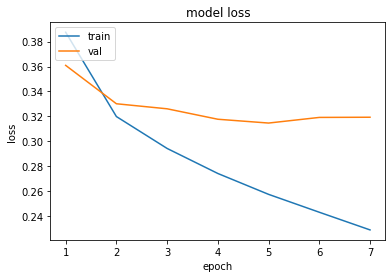

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# testing on the real test data (not the eval data)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test, batch_size=64)[1]))

775/775 [==============================] - 26s 33ms/step - loss: 0.3282 - acc: 0.8633

 테스트 정확도: 0.8633


## CNN-LSTM

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, Embedding
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
vocab_size = 20744

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Conv1D(filters=128, kernel_size=5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
# model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


history = model.fit(X_train, y_train, epochs=10, batch_size=64, 
                    callbacks=[earlystopping, checkpoint], validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 100)         2074400   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 200)               183200    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 2,321,929
Trainable params: 2,321,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1858/1858 [==============================] - 50s 25ms/step - loss: 0.4479 - acc: 0.7770 - val_loss:

In [ ]:
PATH = "/gdrive/MyDrive/01. Programming/2021 데청캠/머신러닝,딥러닝/nsmc-master/"

model.save(PATH + "CNNLSTM_unified_NaverMovie_210720.h5")   # test acc 0.79

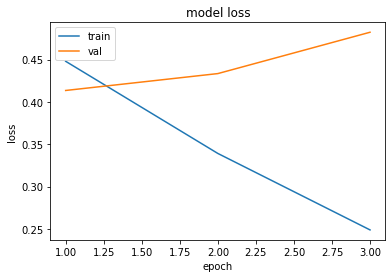

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# testing on the real test data (not the eval data)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test, batch_size=64)[1]))

775/775 [==============================] - 3s 4ms/step - loss: 0.4824 - acc: 0.7925

 테스트 정확도: 0.7925
